In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [44]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("titanic.csv")

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


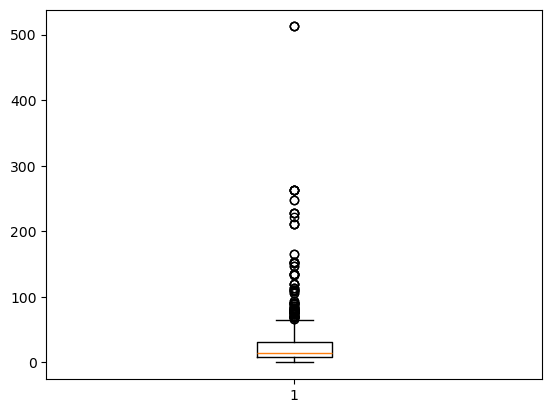

In [11]:
plt.boxplot(df['Fare'])
plt.show()

In [12]:
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1

df = df[(df["Fare"] >= Q1 - 1.5 * IQR) & (df["Fare"] <= Q3 + 1.5 * IQR)]

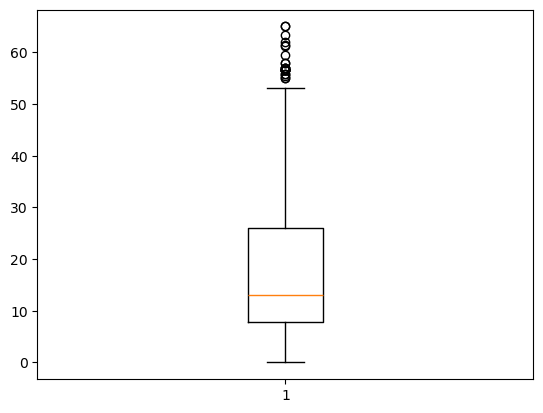

In [13]:
plt.boxplot(df['Fare'])
plt.show()

In [15]:
#Separate titles of names
df['Title'] = df['Name'].apply(lambda x: x.split(', ')[1].split('.')[0].strip())


C:\Users\ufml\AppData\Local\Temp\ipykernel_22748\774943789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Name'].apply(lambda x: x.split(', ')[1].split('.')[0].strip())


In [21]:
title_age_median = df.groupby('Title')['Age'].median()
title_age_median

Title
Col         58.0
Don         40.0
Dr          40.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.0
Miss        19.0
Mlle        24.0
Mr          29.5
Mrs         33.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64

In [22]:
def fill_age(cols):
    Age = cols[0]
    Title = cols[1]

    if pd.isnull(Age):
        #if in median list then use it
        if Title in title_age_median:
            return title_age_median[Title]
        else:
            #if not found use average of all
            return df['Age'].median()
    else:
        return Age

df['Age'] = df[['Age', 'Title']].apply(fill_age, axis=1)


C:\Users\ufml\AppData\Local\Temp\ipykernel_22748\1750254741.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\ufml\AppData\Local\Temp\ipykernel_22748\1750254741.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Title = cols[1]
C:\Users\ufml\AppData\Local\Temp\ipykernel_22748\1750254741.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = d

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,29.5,0,0,330877,8.4583,NaN,Q,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [25]:
most_frequent_embarked = df['Embarked'].mode()[0]
most_frequent_embarked

'S'

In [26]:
df['Embarked'] = df['Embarked'].fillna(most_frequent_embarked)

C:\Users\ufml\AppData\Local\Temp\ipykernel_22748\2135753116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = df['Embarked'].fillna(most_frequent_embarked)


In [27]:
df = df.drop(['Cabin', 'Ticket', 'Name', 'Title'], axis=1)
#drop unneccessery columns

In [29]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [33]:
print(df.groupby('FamilySize')['Survived'].mean().sort_values(ascending=True))

FamilySize
8    0.000000
6    0.055556
5    0.076923
1    0.270378
7    0.333333
2    0.487603
3    0.575000
4    0.727273
Name: Survived, dtype: float64


In [35]:
#Each non numerical feature needs to be one hot encoded
sex_dummies = pd.get_dummies(df['Sex'], drop_first=True, prefix='Sex')
embarked_dummies = pd.get_dummies(df['Embarked'], drop_first=True, prefix='Embarked')
pclass_dummies = pd.get_dummies(df['Pclass'], drop_first=True, prefix='Pclass')

In [37]:
df = pd.concat([df, sex_dummies, embarked_dummies, pclass_dummies], axis=1)
#concatenate these 3 to the main DataFrame

In [38]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,3,male,22.0,7.2500,S,2,True,False,True,False,True
2,3,1,3,female,26.0,7.9250,S,1,False,False,True,False,True
3,4,1,1,female,35.0,53.1000,S,2,False,False,True,False,False
4,5,0,3,male,35.0,8.0500,S,1,True,False,True,False,True
5,6,0,3,male,29.5,8.4583,Q,1,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S,1,True,False,True,True,False
887,888,1,1,female,19.0,30.0000,S,1,False,False,True,False,False
888,889,0,3,female,19.0,23.4500,S,4,False,False,True,False,True
889,890,1,1,male,26.0,30.0000,C,1,True,False,False,False,False


In [41]:
#drop columns that are not needed
df = df.drop(['Sex', 'Embarked', 'Pclass', 'PassengerId'], axis=1)

In [42]:
#The clean and fully outlier free Dataframe here

In [43]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [51]:
y_pred = model.predict(X_test_scaled)


In [53]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0])

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7548387096774194
Confusion Matrix:
 [[83 12]
 [26 34]]
